# Introduction to Linear Regression 

* What is Linear Regression ?
* What is correlation ?
* Reading a Dataset for Linear Regression 
* Exploratory Data Analysis and Visualization
* Feature Engineering 
* Building Linear Regression Model
* Model Evaluation 
* Model Fine Tunning
* Final Results

## Linear Regression 

## Correlation

## Loading Dataset for Linear Regression 

### Loading required libraries

In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline

In [7]:
### Reading the dataset ( make sure the data is in the current directory or also mention the directory path where data lies)

df=pd.read_csv('Linear_regression_dataset.csv')

In [8]:
# check the shape of the data
df.shape

(1232, 6)

The dataset set contains 1232 rows and 6 columns 

In [15]:
#view few rows of the dataset
df.head(3)

,var_1,var_2,var_3,var_4,var_5,output
0,734,688,81,0.328,0.259,0.418
1,700,600,94,0.320,0.247,0.389
2,712,705,93,0.311,0.247,0.417


In [9]:
# View more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 6 columns):
var_1     1232 non-null int64
var_2     1232 non-null int64
var_3     1232 non-null int64
var_4     1232 non-null float64
var_5     1232 non-null float64
output    1232 non-null float64
dtypes: float64(3), int64(3)
memory usage: 57.8 KB


The dataset does not contain any missing values and datatypes are int and floats 

In [10]:
df.describe()

,var_1,var_2,var_3,var_4,var_5,output
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,715.081981,715.081981,80.904221,0.326331,0.259273,0.397342
std,91.534294,93.079933,11.458139,0.015013,0.012907,0.033267
min,463.000000,472.000000,40.000000,0.277000,0.214000,0.301000
25%,652.000000,649.750000,73.000000,0.317000,0.251000,0.375000
50%,711.000000,709.000000,81.000000,0.326000,0.260000,0.396000
75%,775.000000,774.250000,89.000000,0.337000,0.268000,0.421000
max,1009.000000,1103.000000,116.000000,0.373000,0.294000,0.491000


## Exploratory Data Analysis 

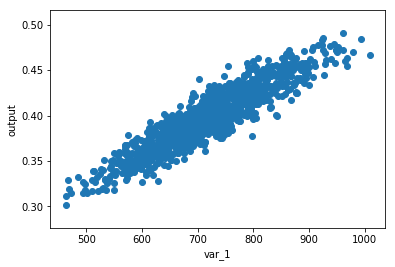

In [14]:
plt.scatter(df['var_1'],df['output'])
plt.xlabel('var_1')
plt.ylabel('output')
plt.show()

Strong relationship between var_1 and output

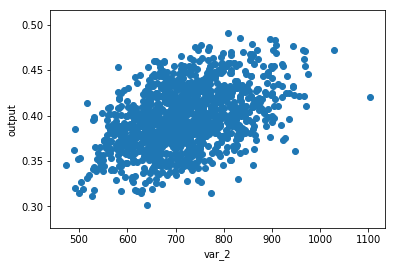

In [22]:
plt.scatter(df['var_2'],df['output'])
plt.xlabel('var_2')
plt.ylabel('output')
plt.show()

Relatively weak relationship between var_2 and output

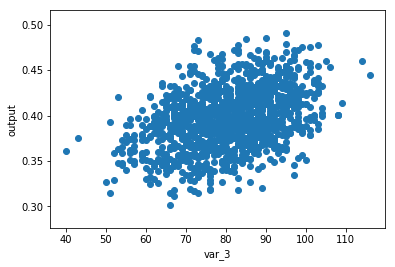

In [23]:
plt.scatter(df['var_3'],df['output'])
plt.xlabel('var_3')
plt.ylabel('output')
plt.show()

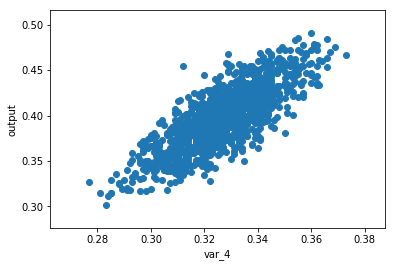

In [24]:
plt.scatter(df['var_4'],df['output'])
plt.xlabel('var_4')
plt.ylabel('output')
plt.show()

Strong relationship between var_4 and output

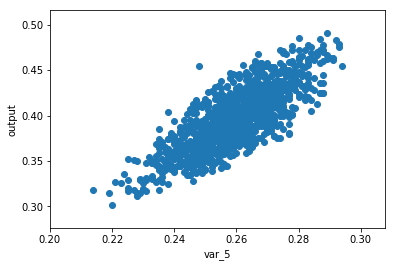

In [25]:
plt.scatter(df['var_5'],df['output'])
plt.xlabel('var_5')
plt.ylabel('output')
plt.show()

## Correlation plot to view relationship amongst input variables and output

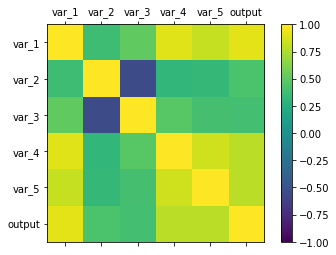

In [30]:
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax,)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

var_2 and var_3 are strongly negatively correlated ( issue of multi collinearity) 

## Feature Engineering

Creating the input variables and output/target variables 

* X = Input variables
* y = Target/output variables

In [32]:
X=df.loc[:,df.columns !='output']

In [63]:
df.iloc[:,[0,3]]

,var_1,var_4
0,734,0.328
1,700,0.320
2,712,0.311
3,734,0.315
4,613,0.302
5,748,0.318
6,669,0.315
7,667,0.324
8,758,0.330
9,726,0.335


In [34]:
X.shape

(1232, 5)

In [36]:
X.head(3)

,var_1,var_2,var_3,var_4,var_5
0,734,688,81,0.328,0.259
1,700,600,94,0.320,0.247
2,712,705,93,0.311,0.247


In [37]:
y=df['output']

In [35]:
y.shape

(1232,)

In [38]:
y.head(3)

0    0.418
1    0.389
2    0.417
Name: output, dtype: float64

### Split intro train and test set for model buulding and validation purpose 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [41]:
X_train.shape

(862, 5)

In [42]:
X_test.shape

(370, 5)

In [43]:
y_train.shape

(862,)

In [44]:
y_test.shape

(370,)

## Build Linear Regression Model

In [45]:
lr = LinearRegression().fit(X_train, y_train)

In [48]:
lr.coef_

array([  3.26446605e-04,   5.61876540e-05,   2.13640209e-04,
        -6.03043663e-01,   4.91331050e-01])

In [50]:
lr.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

## Model Evaluation 

In [54]:
print(" The accuracy of model on training dataset is {:.2f} ".format(lr.score(X_train,y_train)))

 The accuracy of model on training dataset is 0.87 


In [55]:
print(" The accuracy of model on test dataset is {:.2f} ".format(lr.score(X_test,y_test)))

 The accuracy of model on test dataset is 0.87 


## Model fine Tunning

In [70]:
def lr_model(num_features):
    for i in range(num_features):
        X=df.iloc[:,[0,i+1]]
        y=df['output']
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
        lr = LinearRegression().fit(X_train, y_train)
        print(" The accuracy of model on training dataset for {} is {:.5f} ".format(i+1,lr.score(X_train,y_train)))
        print(" The accuracy of model on test dataset for {} is {:.5f} ".format(i+1,lr.score(X_test,y_test)))
        

        

In [71]:
lr_model(num_features=5)

 The accuracy of model on training dataset for 1 is 0.85377 
 The accuracy of model on test dataset for 1 is 0.85013 
 The accuracy of model on training dataset for 2 is 0.85084 
 The accuracy of model on test dataset for 2 is 0.84852 
 The accuracy of model on training dataset for 3 is 0.84969 
 The accuracy of model on test dataset for 3 is 0.85300 
 The accuracy of model on training dataset for 4 is 0.84827 
 The accuracy of model on test dataset for 4 is 0.84297 
 The accuracy of model on training dataset for 5 is 1.00000 
 The accuracy of model on test dataset for 5 is 1.00000 
